# 4. Efficient frontiers
Efficient frontiers and maximum Sharpe ratios of deep clustering and baseline models are computed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.get_portfolio import *

In [ ]:
# deep clustering best model
model = "umap10_arch[200, 200, 50]_c20"

In [ ]:
# data
tb = pd.read_csv("data/3-MonthTreasuryBill(Monthly).csv")["TB3MS"].drop(12) # 3-month treasury bill
df_logret = pd.read_csv(f"n2d-rts/{model}_weighted_average_time_series.csv") # deep clustering models' representative time series

In [ ]:
model_efficient_frontier = {}
model_ef_weights = {}
model_year_max_sharpe = {}
model_year_weights = {}
model_year_return_std = {}
d = 365

dataframes = {"n2d": f"rts/{model}_weighted_average_time_series.csv",
              "factor": "rts/factor_weighted_average_time_series.csv",
              "kmeans": "rts/kmeans_pearson_corr_weighted_average_time_series.csv",
              "dtw": "rts/dtw_weighted_average_time_series.csv",
              }
for m in ["n2d", "factor", "kmeans", "dtw"]:
    df_logret = pd.read_csv(dataframes[m]).drop(0, axis=0)

    # 연 Efficient frontier
    d = 365
    average_returns = (df_logret.mean()*d).to_numpy()
    covariance_matrix = (df_logret.cov()*d).to_numpy()

    portf_rtn_ef, portf_vol_ef, weights_ef = get_efficient_frontier(average_returns, covariance_matrix)
    model_efficient_frontier[m] = (portf_rtn_ef, portf_vol_ef)
    model_ef_weights[m] = weights_ef
    
    # 연 최대 샤프지수 포트폴리오
    max_sharpe_portfolio = get_max_sharpe_portfolio(average_returns, covariance_matrix, rf_rate=np.mean(tb)*12)
    
    model_year_max_sharpe[m] = max_sharpe_portfolio["Sharpe Ratio"]
    model_year_weights[m] = max_sharpe_portfolio["Weights"]
    model_year_return_std[m] = (max_sharpe_portfolio["Return"], max_sharpe_portfolio["Std"])

In [ ]:
# maximum Sharpe ratio
for i, m in enumerate(model_year_max_sharpe.keys()):
    print(f"{m} year sharpe ratio: {model_year_max_sharpe[m].round(2)}")

n2d year sharpe ratio: 2.77
factor year sharpe ratio: 1.51
kmeans year sharpe ratio: 1.94
dtw year sharpe ratio: 3.39


In [ ]:
# portfolio weights
for i, m in enumerate(model_year_weights.keys()):
    print(f"{m} weights: {model_year_weights[m]}")

n2d weights: [0.12 0.   0.5  0.38]
factor weights: [0.  0.5 0.  0.5]
kmeans weights: [0.  0.5 0.5 0. ]
dtw weights: [0.    0.339 0.5   0.161]


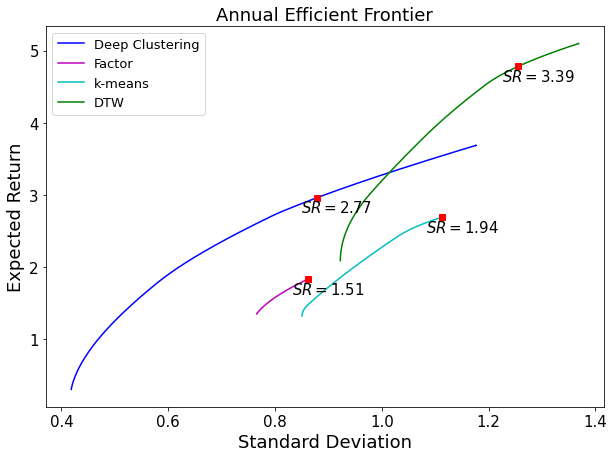

In [ ]:
# efficient frontiers figure
fig, ax = plt.subplots(figsize=(10,7))
colors = ["b", "m", "c","g", "y" "r"]
names = {"n2d": "Deep Clustering", "factor": "Factor", "kmeans": "k-means", "dtw": "DTW"}

for i, m in enumerate(model_efficient_frontier.keys()):
    (mus, sigmas) = model_efficient_frontier[m]
    plt.plot(sigmas, mus, colors[i], label=f"{names[m]}")

    # 탄젠트 포트폴리오 마커
    plt.plot(model_year_return_std[m][1], model_year_return_std[m][0], "rs")
    ax.annotate(
        r"$SR = %.2f$" % model_year_max_sharpe[m],
        xy=(model_year_return_std[m][1] - 0.03, model_year_return_std[m][0] - 0.2),
    )

ax.set(
    xlabel = "Standard Deviation",
    ylabel = "Expected Return",
    title = "Annual Efficient Frontier"
    )

# 글자크기
plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize="large")   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=13)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

plt.legend()
plt.show()